In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Track layers and Hit

## nStations

4mu nStations structure: [[3, 4, 2, 3], [3, 4, 4, 1, 3], [4, 4, 3, ... 2, 1], [4, 2, 3, 4, 1], [3, 4, 4, 4]]
2mu2e nStations structure: [[4, 4], [4, 4], [4, 4, 3], [2, 4], [3, ... [4, 2], [3, 3, 3, 3], [4, 3], [4, 3]]
4mu nStations structure: [[4, 3, 3, 3], [4, 2, 3, 4], [4, 2, 1, 4, ... 3, 3, 4], [3, 4, 4, 1], [4, 3, 4, 3]]
2mu2e nStations structure: [[2, 3], [2, 2], [4, 4], [4, 3], [3, 4], ... [3, 3], [3, 3], [4, 4], [3, 3], [3, 3]]
4mu nStations structure: [[4, 3, 4, 1, 4], [4, 4, 4], [4, 4, 4, 3, ... 4, 4, 4], [4, 3, 2, 4], [2, 1, 2, 4]]
2mu2e nStations structure: [[3, 3], [3, 3], [4, 4], [3, 1], [4, 4, 1, ... 3, 3], [4, 3], [1, 4], [3, 4], [4, 4]]
4mu nStations structure: [[3, 3, 4, 3], [2, 4, 2, 1], [4, 3, 2], ... [3, 1, 4], [4, 4, 3, 3], [4, 3, 2, 3]]
2mu2e nStations structure: [[4, 4], [4, 4], [3], [4], [4, 1, 3], [3, ... 3], [2, 2], [4, 4], [4, 3], [4], [3]]
4mu nStations structure: [[3, 2, 0], [], [2, 3, 3], [3], [3, 3, 4, ... 3], [3, 1, 3, 1], [4], [4, 3, 3, 4, 1]]
2mu2e nSt

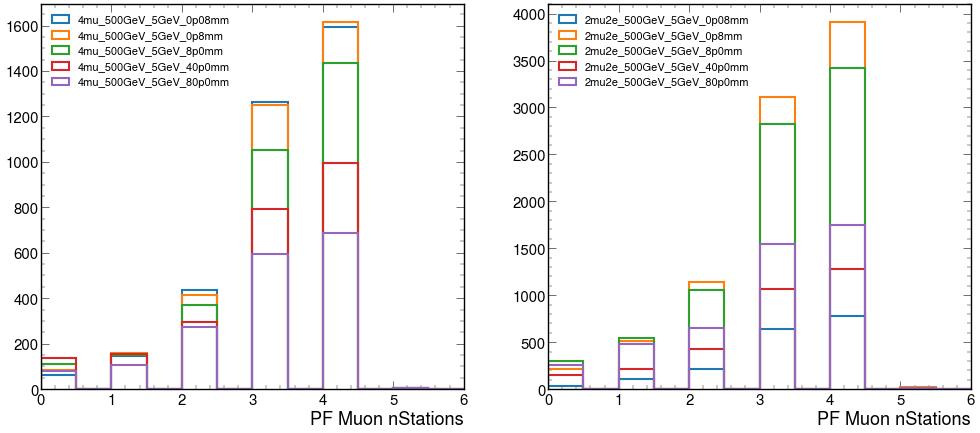

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nStations", events_4mu[i_4mu].nStations, events_2mu2e[i_2mu].nStations)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Muon nStations')
ax[1].set_xlabel('PF Muon nStations')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/PF_MUON/Track_and_hits/nStations.png", bbox_inches="tight")

## nTrackerLayers

4mu nTrackerLayers structure: [[14, 13, 14, 14], [15, 16, 15, 0, 14], ... [14, 14, 14, 14, 13], [13, 13, 13, 14]]
2mu2e nTrackerLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, ... [13, 13, 14, 11], [13, 13], [16, 15]]
4mu nTrackerLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], [11, ... 14], [10, 14, 13, 10], [12, 14, 14, 11]]
2mu2e nTrackerLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... [10, 12], [11, 11], [14, 14], [12, 13]]
4mu nTrackerLayers structure: [[17, 9, 16, 0, 16], [0, 10, 10], [11, 13, ... 9], [15, 7, 9, 15], [12, 9, 9, 13]]
2mu2e nTrackerLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], [12, ... 12], [10, 10], [0, 14], [8, 8], [0, 9]]
4mu nTrackerLayers structure: [[0, 13, 0, 12], [0, 0, 0, 11], [9, 7, 13, ... 4, 7], [12, 7, 6, 12], [0, 12, 0, 12]]
2mu2e nTrackerLayers structure: [[8, 9], [12, 12], [8], [0], [7, 0, 6], ... [0, 0], [0, 7], [11, 12], [7], [0]]
4mu nTrackerLayers structure: [[0, 0, 4], [], [0, 0, 5], [0], [11, ... [10, 9, 11, 1

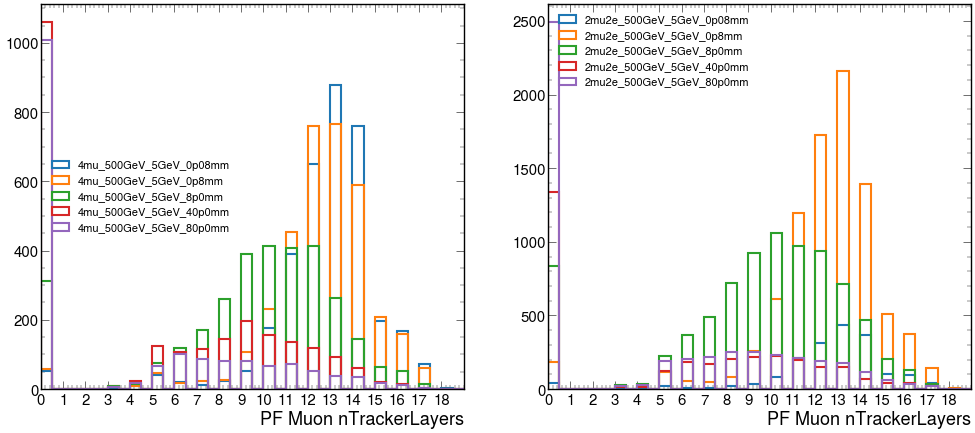

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nTrackerLayers", events_4mu[i_4mu].nTrackerLayers, events_2mu2e[i_2mu].nTrackerLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon nTrackerLayers')
ax[1].set_xlabel('PF Muon nTrackerLayers')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.savefig("../Plots/PF_MUON/Track_and_hits/nTrackerLayers.png", bbox_inches="tight")

## trkPt

4mu trkPt structure: [[186, 177, 73.8, 65.7], [236, 183, 64.1, ... 8.82, 3.11], [167, 125, 110, 84.5]]
2mu2e trkPt structure: [[86.5, 25.5], [239, 6.4], [201, 17.8, ... 5.84, 3.43], [111, 23.4], [103, 102]]
4mu trkPt structure: [[129, 99.1, 87.4, 59], [206, 184, 63.1, ... 130, 105, 27.5], [175, 126, 120, 74.5]]
2mu2e trkPt structure: [[110, 82.6], [257, 6.2], [211, 41.3], ... [204, 51], [121, 84.9], [38.9, 28.1]]
4mu trkPt structure: [[120, 98.7, 50.8, 23.1, 3.51], [404, 215, ... 68.7, 7.63], [211, 183, 73.7, 15.9]]
2mu2e trkPt structure: [[119, 98.3], [140, 123], [169, 17.7], ... [42.2, 33.1], [153, 13.6], [165, 8.99]]
4mu trkPt structure: [[258, 186, 82.5, 24.3], [544, 194, 127, ... 48.3, 18.7], [126, 64.3, 31.8, 11.6]]
2mu2e trkPt structure: [[159, 73.6], [168, 7.38], [99.9], [279], ... 133, 8.74], [84.1, 33.7], [308], [205]]
4mu trkPt structure: [[85.5, 16.5, 4.3], [], [598, 197, 103], ... [992], [163, 138, 41.4, 26.4, 3.68]]
2mu2e trkPt structure: [[222, 28.8, 21.7], [234], [223],

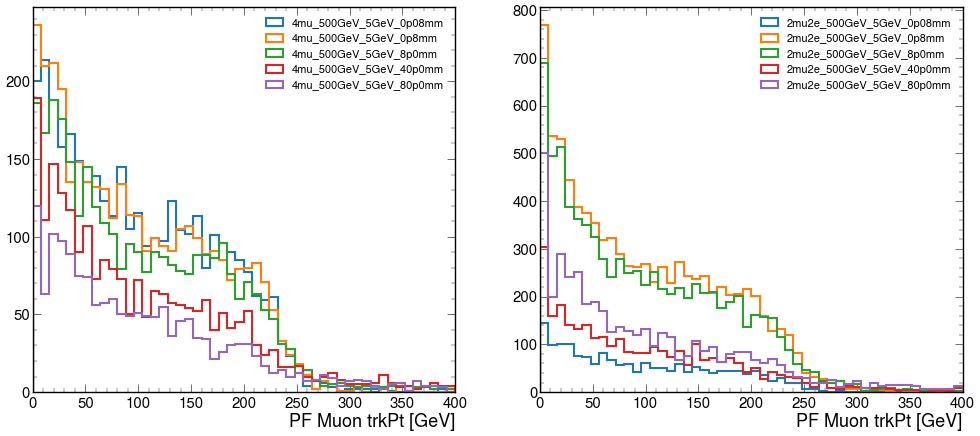

In [30]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkPt", events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkPt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkPt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Muon trkPt [GeV]')
ax[1].set_xlabel('PF Muon trkPt [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkPt.png", bbox_inches="tight")

## pt - trkPt

4mu pt - trkPt structure: [[1.48, 1.46, 0, 0], [-4, -0.305, ... -0.00196, 0], [-1.24, 0, 0.531, 0.0237]]
2mu2e pt - trkPt structure: [[-1.06, 0.0188], [-0.00117, -0.00464], ... [-0.226, 0.00613], [0.0889, -0.313]]
4mu pt - trkPt structure: [[1.94, 0.423, -0.901, 0], [-0.00981, -0.68, ... 0], [1.03, 0.089, 0.201, -0.126]]
2mu2e pt - trkPt structure: [[0, -0.496], [-11, 0.00428], [-0.151, ... 0], [0.296, 0.149], [-0.00817, 0]]
4mu pt - trkPt structure: [[0.393, 0, 0, 0, 0.0529], [0, -0.00061, ... 0, 0.0874], [8.34, 7.13, 0.91, 0.0212]]
2mu2e pt - trkPt structure: [[0.32, 0], [-0.87, -13.9], [7.43, ... -0.0985], [-5.78, -0.0186], [0, 0.00707]]
4mu pt - trkPt structure: [[0, 0, 0, 1.11], [0, 0, 0, 0.045, ... 2.35, -9.65, 0, 0.0151], [0, 1.21, 0, 0.0491]]
2mu2e pt - trkPt structure: [[3.12, -0.128], [-0.271, -0.004], [19.4], ... [0.116, -0.0239], [-0.0849], [0]]
4mu pt - trkPt structure: [[0, 0, -0.000826], [], [0, 0, -10.5], [0, ... 0, 0.408, 0], [0], [5.18, 0, 0, 0, 0]]
2mu2e pt - trkPt s

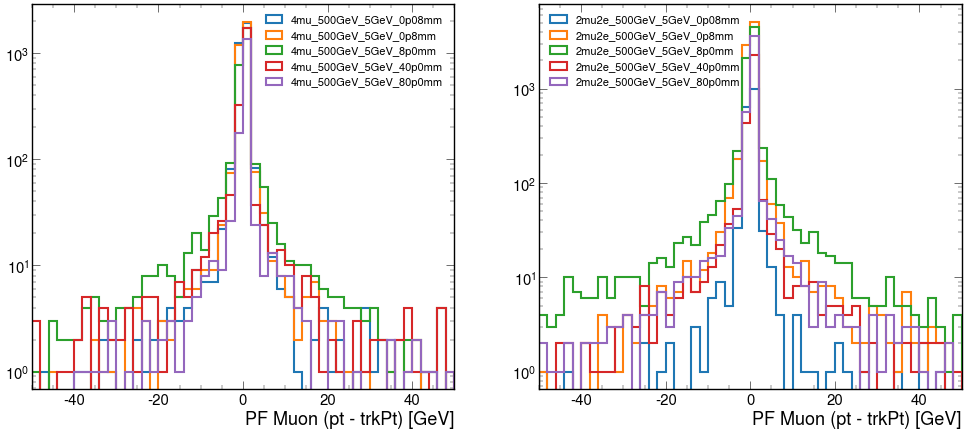

In [33]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - trkPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-50,50)
ax[1].set_xlim(-50,50)
ax[0].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Track_and_hits/pt-trkPt.png", bbox_inches="tight")

## trkNumPlanes

4mu trkNumPlanes structure: [[3, 4, 0, 0], [1, 3, 4, 0, 4], [4, 4, 3, ... 3, 0], [4, 0, 3, 4, 0], [3, 0, 4, 4]]
2mu2e trkNumPlanes structure: [[3, 4], [4, 3], [2, 4, 3], [0, 4], [0, ... [4, 0], [0, 2, 4, 2], [4, 3], [4, 3]]
4mu trkNumPlanes structure: [[4, 3, 4, 0], [4, 3, 3, 4], [0, 0, 4, 1, ... 4, 0, 0], [3, 4, 4, 0], [4, 3, 4, 3]]
2mu2e trkNumPlanes structure: [[0, 3], [2, 3], [4, 4], [3, 2], [4, 4], ... [3, 4], [4, 3], [4, 0], [3, 2], [4, 0]]
4mu trkNumPlanes structure: [[4, 3, 0, 2, 4], [4, 4, 4], [4, 4, 4, 3, ... 0, 4, 3], [4, 3, 0, 4], [2, 2, 2, 4]]
2mu2e trkNumPlanes structure: [[3, 0], [2, 2], [3, 4], [0, 3], [4, 4, 0, ... 2, 3], [4, 3], [0, 4], [3, 4], [4, 4]]
4mu trkNumPlanes structure: [[3, 0, 4, 4], [3, 4, 3, 3], [4, 3, 4], ... [3, 2, 4], [3, 4, 0, 3], [4, 4, 4, 4]]
2mu2e trkNumPlanes structure: [[4, 4], [4, 4], [3], [4], [2, 0, 3], [3, ... 3], [3, 2], [4, 4], [4, 3], [4], [4]]
4mu trkNumPlanes structure: [[4, 2, 3], [], [2, 3, 4], [3], [4, 3, 4, ... 2], [3, 3, 3, 0], [4],

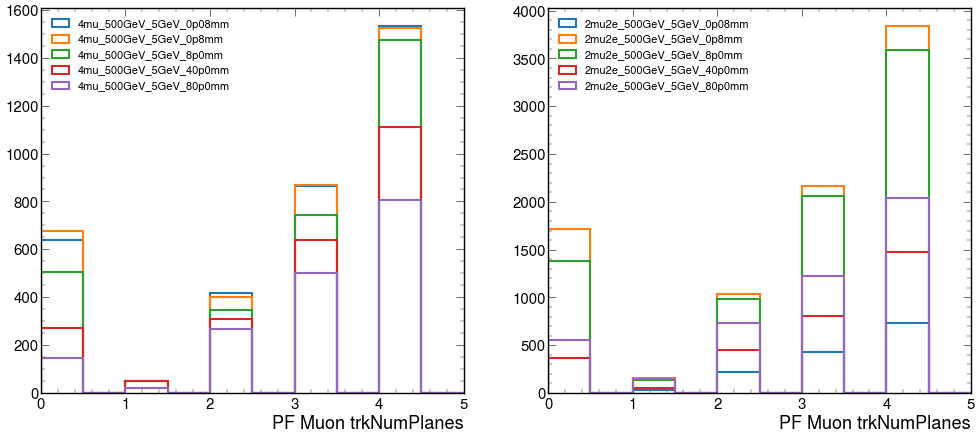

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPlanes", events_4mu[i_4mu].trkNumPlanes, events_2mu2e[i_2mu].trkNumPlanes)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Muon trkNumPlanes')
ax[1].set_xlabel('PF Muon trkNumPlanes')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumPlanes.png", bbox_inches="tight")

## trkNumHits

4mu trkNumHits structure: [[25, 33, 0, 0], [18, 30, 19, 0, 30], ... [49, 0, 20, 48, 0], [24, 0, 47, 38]]
2mu2e trkNumHits structure: [[16, 24], [49, 29], [27, 27, 21], [0, ... [0, 34, 20, 14], [48, 29], [20, 27]]
4mu trkNumHits structure: [[15, 18, 36, 0], [45, 22, 36, 49], [0, 0, ... 0], [41, 50, 43, 0], [42, 36, 47, 35]]
2mu2e trkNumHits structure: [[0, 23], [10, 27], [46, 50], [31, 25], ... [34, 33], [49, 0], [36, 11], [22, 0]]
4mu trkNumHits structure: [[24, 34, 0, 14, 24], [39, 49, 49], [48, ... 18], [24, 35, 0, 20], [20, 16, 22, 42]]
2mu2e trkNumHits structure: [[34, 0], [33, 27], [28, 48], [0, 27], ... [48, 32], [0, 26], [28, 49], [46, 23]]
4mu trkNumHits structure: [[23, 0, 39, 11], [12, 39, 15, 29], [48, ... 47], [36, 23, 0, 40], [27, 19, 16, 19]]
2mu2e trkNumHits structure: [[35, 35], [50, 46], [24], [47], [21, 0, ... 28, 25], [25, 26], [44, 34], [28], [30]]
4mu trkNumHits structure: [[35, 12, 24], [], [18, 33, 47], [28], ... 22, 27, 27, 0], [40], [45, 30, 34, 22, 0]]
2mu2e t

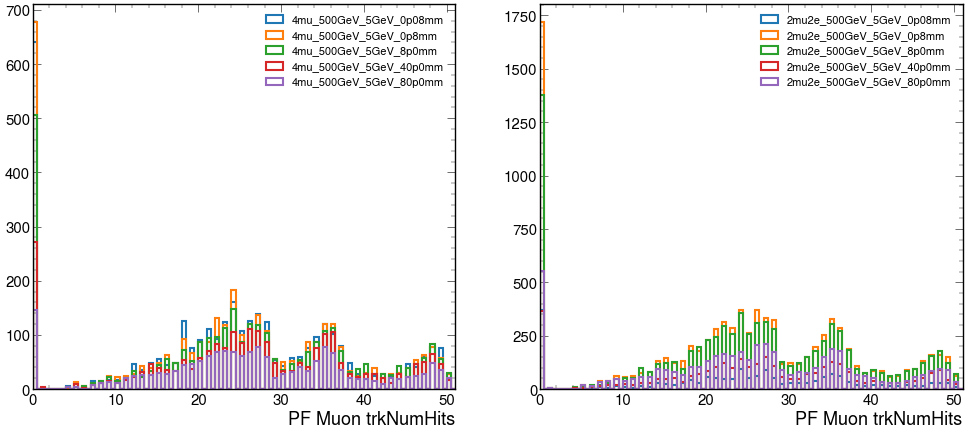

In [42]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumHits", events_4mu[i_4mu].trkNumHits, events_2mu2e[i_2mu].trkNumHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,51)
ax[1].set_xlim(0,51)
ax[0].set_xlabel('PF Muon trkNumHits')
ax[1].set_xlabel('PF Muon trkNumHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumHits.png", bbox_inches="tight")

## trkNumDTHits

4mu trkNumDTHits structure: [[21, 28, 0, 0], [0, 0, 0, 0, 0], [12, ... 0], [43, 0, 15, 44, 0], [19, 0, 42, 34]]
2mu2e trkNumDTHits structure: [[0, 0], [43, 26], [16, 23, 0], [0, 30], ... 43, 0], [0, 24, 0, 0], [43, 25], [0, 0]]
4mu trkNumDTHits structure: [[0, 15, 31, 0], [39, 18, 31, 44], [0, 0, ... 0], [36, 44, 38, 0], [37, 31, 42, 30]]
2mu2e trkNumDTHits structure: [[0, 19], [7, 22], [41, 44], [12, 15], ... [30, 29], [43, 0], [31, 8], [0, 0]]
4mu trkNumDTHits structure: [[0, 31, 0, 12, 0], [33, 44, 44], [42, 34, ... 0], [0, 31, 0, 0], [17, 12, 12, 37]]
2mu2e trkNumDTHits structure: [[30, 0], [23, 23], [24, 42], [0, 22], ... [42, 30], [0, 0], [24, 44], [40, 18]]
4mu trkNumDTHits structure: [[19, 0, 34, 0], [8, 34, 12, 24], [42, 19, ... 41], [25, 19, 0, 35], [0, 0, 0, 0]]
2mu2e trkNumDTHits structure: [[29, 29], [44, 41], [0], [41], [12, 0, 12, ... 24, 23], [0, 0], [40, 31], [0], [24]]
4mu trkNumDTHits structure: [[30, 0, 12], [], [15, 30, 42], [23], ... 19, 23, 25, 0], [35], [0, 25, 

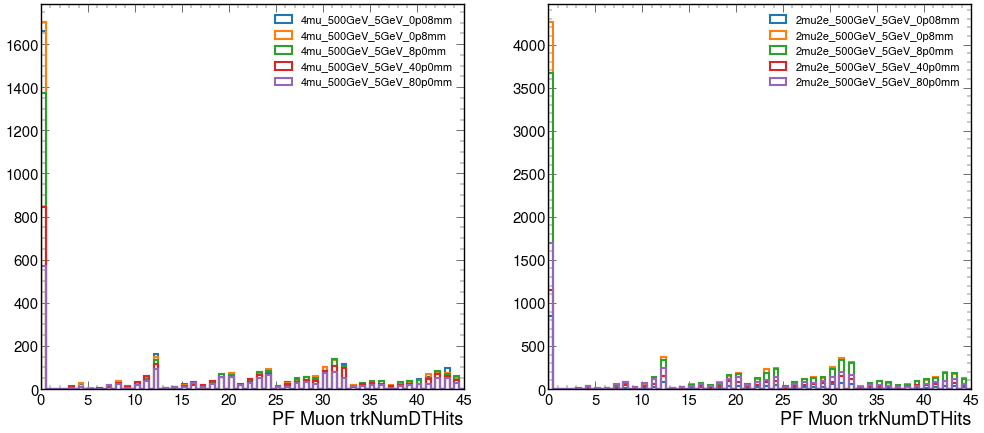

In [45]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumDTHits", events_4mu[i_4mu].trkNumDTHits, events_2mu2e[i_2mu].trkNumDTHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,45)
ax[1].set_xlim(0,45)
ax[0].set_xlabel('PF Muon trkNumDTHits')
ax[1].set_xlabel('PF Muon trkNumDTHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumDTHits.png", bbox_inches="tight")

## trkNumCSCHits

4mu trkNumCSCHits structure: [[0, 0, 0, 0], [18, 30, 18, 0, 28], [0, 0, ... 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[16, 24], [0, 0], [6, 0, 18], [0, 0], ... 0, 0], [0, 5, 18, 12], [0, 0], [17, 24]]
4mu trkNumCSCHits structure: [[12, 0, 0, 0], [0, 0, 0, 0], [0, 0, 10, ... 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [0, 0], [15, 6], [0, 0, ... 18], [0, 0], [0, 0], [0, 0], [22, 0]]
4mu trkNumCSCHits structure: [[23, 0, 0, 0, 24], [0, 0, 0], [0, 0, 0, ... 0, 0, 16], [24, 0, 0, 20], [0, 0, 6, 0]]
2mu2e trkNumCSCHits structure: [[0, 0], [6, 0], [0, 0], [0, 0], [0, 0, ... 0, 0], [0, 0], [0, 24], [0, 0], [0, 0]]
4mu trkNumCSCHits structure: [[0, 0, 0, 9], [0, 0, 0, 0], [0, 0, 16, ... 0, 0, 0], [6, 0, 0, 0], [23, 18, 12, 17]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [21], [0], [6, 0, 12], ... [0, 0], [21, 22], [0, 0], [24], [0]]
4mu trkNumCSCHits structure: [[0, 11, 9], [], [0, 0, 0], [0], [18, 0, ... [0, 0, 0, 0], 

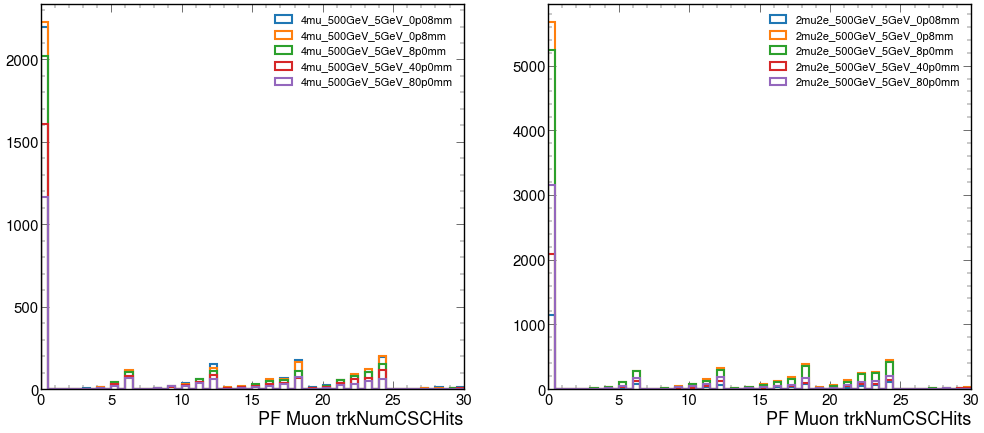

In [54]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumCSCHits", events_4mu[i_4mu].trkNumCSCHits, events_2mu2e[i_2mu].trkNumCSCHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Muon trkNumCSCHits')
ax[1].set_xlabel('PF Muon trkNumCSCHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumCSCHits.png", bbox_inches="tight")

## trkNumPixelHits

4mu trkNumPixelHits structure: [[4, 3, 4, 4], [4, 7, 8, -1, 3], [3, 4, 2, ... 3, 2], [4, 5, 4, 4, 6], [4, 3, 4, 4]]
2mu2e trkNumPixelHits structure: [[7, 5], [4, 4], [2, 4, 2], [3, 3], [4, ... [4, 4], [5, 5, 4, 3], [4, 3], [5, 4]]
4mu trkNumPixelHits structure: [[5, 2, 0, 5], [5, 4, 4, 4], [3, 4, 0, 3, ... 4, 4, 4], [2, 4, 4, 3], [3, 4, 4, 3]]
2mu2e trkNumPixelHits structure: [[4, 4], [2, 2], [5, 3], [3, 3], [4, 4], ... [5, 4], [4, 3], [2, 1], [4, 4], [6, 7]]
4mu trkNumPixelHits structure: [[7, 1, 7, -1, 7], [-1, 0, 0], [1, 3, 1, 2, ... 0, 0, 0], [6, 0, 0, 8], [3, 1, 1, 4]]
2mu2e trkNumPixelHits structure: [[3, 3], [0, 0], [0, 0], [0, 0], [3, 3, ... 3, 3], [0, 0], [-1, 3], [0, 0], [-1, 0]]
4mu trkNumPixelHits structure: [[-1, 1, -1, 0], [-1, -1, -1, 4], [0, 0, 4, ... 0, 0], [2, 0, 0, 2], [-1, 0, -1, 0]]
2mu2e trkNumPixelHits structure: [[0, 1], [4, 3], [0], [-1], [0, -1, 0], ... [-1, -1], [-1, 0], [3, 3], [0], [-1]]
4mu trkNumPixelHits structure: [[-1, -1, 2], [], [-1, -1, 0], [-1], [0

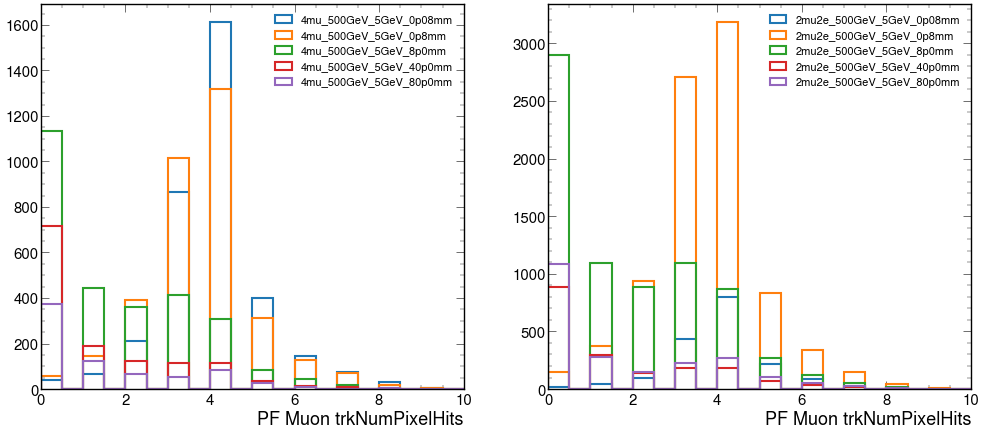

In [56]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPixelHits", events_4mu[i_4mu].trkNumPixelHits, events_2mu2e[i_2mu].trkNumPixelHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Muon trkNumPixelHits')
ax[1].set_xlabel('PF Muon trkNumPixelHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumPixelHits.png", bbox_inches="tight")

## trkNumTrkLayers

4mu trkNumTrkLayers structure: [[14, 13, 14, 14], [15, 16, 15, -1, 14], ... [14, 14, 14, 14, 13], [13, 13, 13, 14]]
2mu2e trkNumTrkLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, ... [13, 13, 14, 11], [13, 13], [16, 15]]
4mu trkNumTrkLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], [11, ... 14], [10, 14, 13, 10], [12, 14, 14, 11]]
2mu2e trkNumTrkLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... [10, 12], [11, 11], [14, 14], [12, 13]]
4mu trkNumTrkLayers structure: [[17, 9, 16, -1, 16], [-1, 10, 10], [11, 13, ... 9], [15, 7, 9, 15], [12, 9, 9, 13]]
2mu2e trkNumTrkLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], [12, ... 12], [10, 10], [-1, 14], [8, 8], [-1, 9]]
4mu trkNumTrkLayers structure: [[-1, 13, -1, 12], [-1, -1, -1, 11], [9, 7, ... 7], [12, 7, 6, 12], [-1, 12, -1, 12]]
2mu2e trkNumTrkLayers structure: [[8, 9], [12, 12], [8], [-1], [7, -1, 6], ... [-1, -1], [-1, 7], [11, 12], [7], [-1]]
4mu trkNumTrkLayers structure: [[-1, -1, 4], [], [-1, -1, 5], [-1

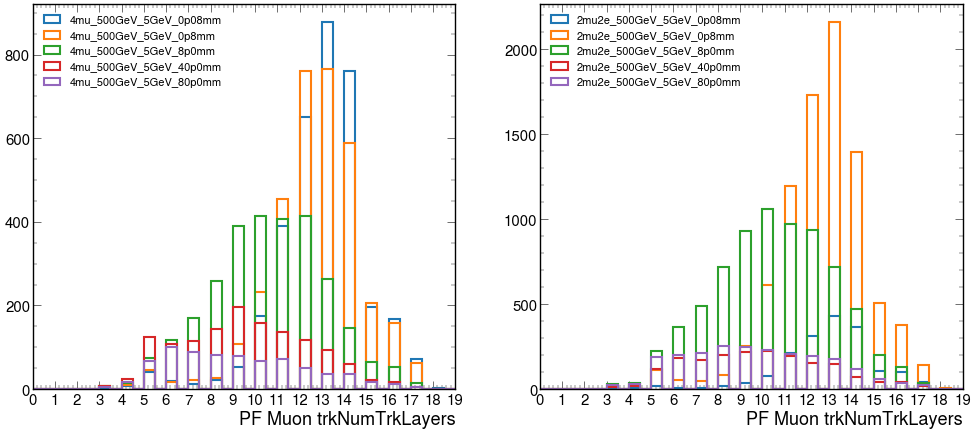

In [67]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumTrkLayers", events_4mu[i_4mu].trkNumTrkLayers, events_2mu2e[i_2mu].trkNumTrkLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon trkNumTrkLayers')
ax[1].set_xlabel('PF Muon trkNumTrkLayers')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumTrkLayers.png", bbox_inches="tight")